In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

In [ ]:
%cd /content/drive/MyDrive/yolov5/yolov5
!pip install -r requirements.txt

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

In [ ]:
model

In [ ]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [ ]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 250.2ms pre-process, 24.7ms inference, 5.1ms NMS per image at shape (1, 3, 384, 640)


In [ ]:
import uuid   # Unique identifier
import os
import time

In [ ]:
%cd /content/drive/MyDrive/yolov5/yolov5
!python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

In [ ]:

model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/yolov5/yolov5/runs/train/exp5/weights/last.pt', force_reload = True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-9-15 Python-3.7.13 torch-1.8.1+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7072156 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [ ]:
img = '/content/drive/MyDrive/yolov5/data/images/bomach.1.8.jpg'

In [ ]:
results = model(img)
detects = results.pandas().xyxy[0].to_dict(orient="records")
print(detects)
results.print()

[{'xmin': 504.4497985839844, 'ymin': 29.944488525390625, 'xmax': 543.6787109375, 'ymax': 76.74308776855469, 'confidence': 0.9622937440872192, 'class': 18, 'name': 'capacitor'}, {'xmin': 571.95703125, 'ymin': 127.98794555664062, 'xmax': 613.1941528320312, 'ymax': 172.45550537109375, 'confidence': 0.950865626335144, 'class': 18, 'name': 'capacitor'}, {'xmin': 507.494873046875, 'ymin': 74.32377624511719, 'xmax': 548.0004272460938, 'ymax': 115.84986114501953, 'confidence': 0.9447806477546692, 'class': 18, 'name': 'capacitor'}, {'xmin': 89.54849243164062, 'ymin': 208.65664672851562, 'xmax': 212.62255859375, 'ymax': 244.20916748046875, 'confidence': 0.9421942234039307, 'class': 19, 'name': 'bosa'}, {'xmin': 563.2923583984375, 'ymin': 92.28959655761719, 'xmax': 605.730712890625, 'ymax': 132.13967895507812, 'confidence': 0.8917734622955322, 'class': 22, 'name': 'non-capacitor'}, {'xmin': 93.60037231445312, 'ymin': 73.79386138916016, 'xmax': 131.77369689941406, 'ymax': 108.35128784179688, 'conf

In [ ]:
for detect in detects:
  confidence = detect['confidence']
  name = detect['name']
  clas = detect['class']
  if confidence > 0.5:
     print(name)

capacitor
capacitor
capacitor
bosa


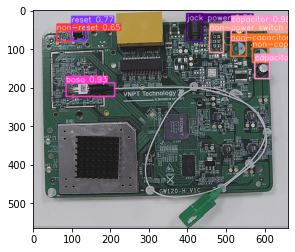

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
from google.colab.patches import cv2_imshow
cap = cv2.imre('/content/drive/MyDrive/yolov5/mach_dung_1.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2_imshow(frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
